In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime

# Import pathlib to create new folder if non-existant
from pathlib import Path

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_file = 'cities.csv'
output_dir = Path('output_data')

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = url + "appid=" + api_key + "&units=" + units + "&q=" 

# Set variables for the for loop
record = 1
set_cities = 1
city_df = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

print('Beginning Data Retrieval')
print('-----------------------------')

# Loop to go through the cities:
for city in cities:
    
    if record > 50:
        record = 1
        set_cities +=1

    print(f'Processing Record {record} of Set {set_cities} | {city}')
    
    try:
        response = requests.get(query_url + city).json()
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        city_df.append(city)

        record +=1
        
    except:
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | new norfolk
Processing Record 3 of Set 1 | fortuna
Processing Record 4 of Set 1 | bambous virieux
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | victoria
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | tasiilaq
Processing Record 10 of Set 1 | san patricio
Processing Record 11 of Set 1 | tuktoyaktuk
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | carnarvon
Processing Record 14 of Set 1 | katsuura
Processing Record 15 of Set 1 | yelabuga
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | cidreira
Processing Record 18 of Set 1 | saleaula
City not found. Skipping...
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | taolanaro
City not found. Skipping...
Processing 

Processing Record 22 of Set 4 | maloshuyka
City not found. Skipping...
Processing Record 22 of Set 4 | todos santos
Processing Record 23 of Set 4 | kalnibolotskaya
Processing Record 24 of Set 4 | sarankhola
Processing Record 25 of Set 4 | marquette
Processing Record 26 of Set 4 | togur
Processing Record 27 of Set 4 | amderma
City not found. Skipping...
Processing Record 27 of Set 4 | belize
City not found. Skipping...
Processing Record 27 of Set 4 | porto velho
Processing Record 28 of Set 4 | paamiut
Processing Record 29 of Set 4 | nizwa
Processing Record 30 of Set 4 | koumac
Processing Record 31 of Set 4 | pacific grove
Processing Record 32 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 32 of Set 4 | nelson bay
Processing Record 33 of Set 4 | provideniya
Processing Record 34 of Set 4 | bilibino
Processing Record 35 of Set 4 | bam
Processing Record 36 of Set 4 | gilgit
Processing Record 37 of Set 4 | kahului
Processing Record 38 of Set 4 | the valley
Processing Re

City not found. Skipping...
Processing Record 39 of Set 7 | kruisfontein
Processing Record 40 of Set 7 | petauke
Processing Record 41 of Set 7 | goure
Processing Record 42 of Set 7 | larsnes
Processing Record 43 of Set 7 | lasa
Processing Record 44 of Set 7 | lumsden
Processing Record 45 of Set 7 | severo-kurilsk
Processing Record 46 of Set 7 | antalaha
Processing Record 47 of Set 7 | laurel
Processing Record 48 of Set 7 | thinadhoo
Processing Record 49 of Set 7 | nome
Processing Record 50 of Set 7 | bua yai
Processing Record 1 of Set 8 | kerema
Processing Record 2 of Set 8 | itarema
Processing Record 3 of Set 8 | plettenberg bay
Processing Record 4 of Set 8 | brae
Processing Record 5 of Set 8 | atambua
Processing Record 6 of Set 8 | ambilobe
Processing Record 7 of Set 8 | kiyasovo
Processing Record 8 of Set 8 | rabo de peixe
Processing Record 9 of Set 8 | marzuq
Processing Record 10 of Set 8 | akom
Processing Record 11 of Set 8 | daru
Processing Record 12 of Set 8 | olaine
Processing 

Processing Record 43 of Set 10 | ariquemes
Processing Record 44 of Set 10 | ruatoria
City not found. Skipping...
Processing Record 44 of Set 10 | samusu
City not found. Skipping...
Processing Record 44 of Set 10 | kananga
Processing Record 45 of Set 10 | tuquerres
Processing Record 46 of Set 10 | along
Processing Record 47 of Set 10 | hobyo
Processing Record 48 of Set 10 | kitimat
Processing Record 49 of Set 10 | sterling
Processing Record 50 of Set 10 | tabas
Processing Record 1 of Set 11 | llangefni
Processing Record 2 of Set 11 | tyukhtet
Processing Record 3 of Set 11 | broome
Processing Record 4 of Set 11 | hay river
Processing Record 5 of Set 11 | ust-ishim
Processing Record 6 of Set 11 | gurskoye
City not found. Skipping...
Processing Record 6 of Set 11 | aporawan
City not found. Skipping...
Processing Record 6 of Set 11 | marrakesh
Processing Record 7 of Set 11 | altamira
Processing Record 8 of Set 11 | bushehr
Processing Record 9 of Set 11 | san felipe
Processing Record 10 of S

In [4]:
# Add the data to a new dataframe

cities_df = pd.DataFrame({"City": city_df,
                         "Cloudiness": cloudiness,
                         "Country": country,
                         "Date": date,
                         "Humidity": humidity,
                         "Lat": lat,
                         "Lng": lng,
                         "Max Temp": max_temp,
                         "Wind Speed": wind_speed})

In [5]:
# Check details of Data Frame
cities_df.count()

City          552
Cloudiness    552
Country       552
Date          552
Humidity      552
Lat           552
Lng           552
Max Temp      552
Wind Speed    552
dtype: int64

In [6]:
# Check top 5 rows of Data Frame
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,avarua,99,CK,1577577850,69,-21.21,-159.78,78.8,16.11
1,new norfolk,20,AU,1577577850,49,-42.78,147.06,77.0,5.82
2,fortuna,1,US,1577577850,76,40.60,-124.16,54.0,4.70
3,bambous virieux,75,MU,1577577850,83,-20.34,57.76,78.8,12.75
4,hermanus,92,ZA,1577577850,88,-34.42,19.24,68.0,5.99


In [7]:
cities_df['Lat'].max()

78.22

In [8]:
# Export DataFrame to csv
output_dir.mkdir(parents=True, exist_ok=True)

cities_df.to_csv(output_dir / output_file, index = False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [9]:
cities_df['Date day'] = pd.to_datetime(cities_df['Date'], unit = 's').dt.date
date = cities_df['Date day'].unique()[0].strftime('%m-%d-%y')

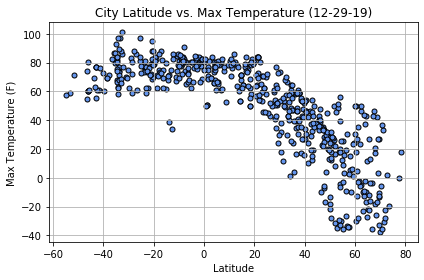

In [13]:
cities_df.plot(kind = "scatter", x = 'Lat', y = "Max Temp", s=25, c='cornflowerblue', edgecolors="black")
plt.title(f'City Latitude vs. Max Temperature ({date})')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.tight_layout()

array([datetime.date(2019, 12, 29), datetime.date(2019, 12, 28)],
      dtype=object)

#### Latitude vs. Humidity Plot

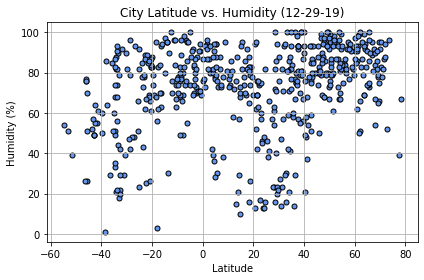

In [15]:
cities_df.plot(kind = "scatter", x = 'Lat', y = "Humidity", s=25, c='cornflowerblue', edgecolors="black")
plt.title(f'City Latitude vs. Humidity ({date})')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.tight_layout()

#### Latitude vs. Cloudiness Plot

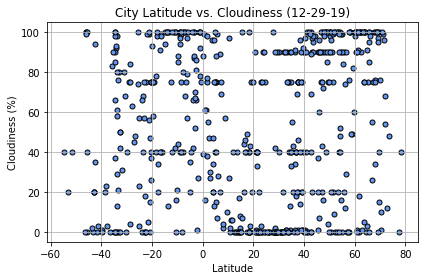

In [17]:
cities_df.plot(kind = "scatter", x = 'Lat', y = "Cloudiness", s=25, c='cornflowerblue', edgecolors="black")
plt.title(f'City Latitude vs. Cloudiness ({date})')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.tight_layout()

#### Latitude vs. Wind Speed Plot

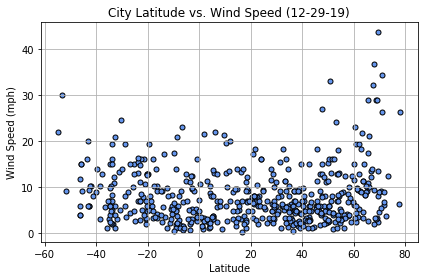

In [18]:
cities_df.plot(kind = "scatter", x = 'Lat', y = "Wind Speed", s=25, c='cornflowerblue', edgecolors="black")
plt.title(f'City Latitude vs. Wind Speed ({date})')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.tight_layout()